In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import emcee
from scipy import stats
rc('text', usetex=True)

In this notebook we will introduce some concepts of Bayesian (or probabilistic) analysis of data. There are many other resources that discuss Bayesian inference, two particular favourites of myself are:

- Data Analysis: A Bayesian Tutorial by D.S. Sivia;
- Frequentism and Bayesianism by Jake VanderPlas (http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/).

In addition to introducing concepts of Bayesian inference, we will also show how Python can be used to perform it.

In [11]:
measurement_number, V, e = np.loadtxt("volume_measurement_data.txt", unpack=True)

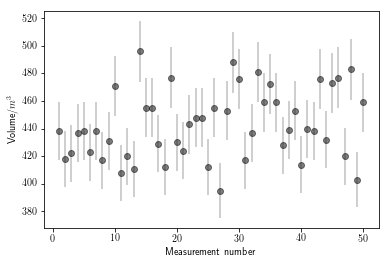

In [12]:
fig, ax = plt.subplots()
ax.errorbar(measurement_number, V, yerr=e, fmt='ok', ecolor='gray', alpha=0.5)
ax.set_xlabel(r'Measurement number')
ax.set_ylabel(r'Volume/$m^3$')
plt.show()

In [13]:
def log_prior(theta):
    return 1

def log_likelihood(theta, V, e):
    return -0.5 * np.sum(np.log(2 * np.pi * e ** 2) + (V - theta) ** 2 / e ** 2)

def log_posterior(theta, V, e):
    #return log_prior(theta) + log_likelihood(theta, V, e)
    return log_likelihood(theta, V, e)

In [14]:
ndim = 1
nwalkers = 50
nburn = 1000
nsteps = 20000

starting_guesses = 450 * np.random.rand(nwalkers, ndim)

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[V, e])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain
sample = sampler.chain[:, nburn:, :].ravel()

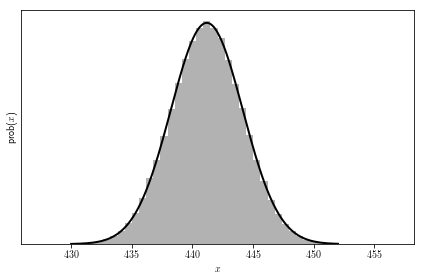

In [15]:
from matplotlib.pyplot import rcParams, rc

plt.hist(sample, bins=50, histtype="stepfilled", alpha=0.3, normed=True, color='k')

F_fit = np.linspace(430, 452, 1000)
pdf = stats.norm(np.mean(sample), np.std(sample)).pdf(F_fit)

plt.plot(F_fit, pdf, '-k', lw=2)
plt.xlabel(r'$x$')
plt.ylabel('prob($x$)')
#plt.xticks([])
plt.yticks([])
plt.tight_layout()